<h3>depth1 to depth4 ROC curve</h3>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
total_fpr = [
[0.        , 0.00222222, 0.00222222, 0.00444444, 0.00444444, 0.00666667,
 0.00666667, 0.00888889, 0.00888889, 0.01111111, 0.01111111, 0.01333333,
 0.01333333, 0.01777778, 0.01777778, 0.02      , 0.02      , 0.02222222,
 0.02222222, 0.02444444, 0.02444444, 0.02666667, 0.02666667, 0.02888889,
 0.02888889, 0.03111111, 0.03111111, 0.03333333, 0.03333333, 0.03555556,
 0.03555556, 0.03777778, 0.03777778, 0.04222222, 0.04222222, 0.04444444,
 0.04444444, 0.04666667, 0.04666667, 0.04888889, 0.04888889, 0.05333333,
 0.05333333, 0.05777778, 0.06222222, 0.06222222, 0.07111111, 0.07111111,
 0.07777778, 0.07777778, 0.08      , 0.08      , 0.08444444, 0.08444444,
 0.08666667, 0.08666667, 0.10666667, 0.10666667, 0.11333333, 0.11333333,
 0.11777778, 0.11777778, 0.12      , 0.12      , 0.12444444, 0.12444444,
 0.12888889, 0.12888889, 0.13111111, 0.13111111, 0.14      , 0.14,
 0.14666667, 0.14666667, 0.16      , 0.16      , 0.16222222, 0.16222222,
 0.17333333, 0.17333333, 0.18      , 0.18      , 0.20444444, 0.20444444,
 0.20888889, 0.20888889, 0.24      , 0.24      , 0.25555556, 0.26,
 0.30444444, 0.30444444, 0.53111111, 0.53555556, 0.59333333, 0.59777778,
 0.60444444, 0.60888889, 0.66222222, 0.66666667, 0.71333333, 0.71777778,
 0.73555556, 0.74      , 0.83777778, 0.83777778, 0.86444444, 0.86888889,
 0.88666667, 0.89111111, 0.93555556, 0.94      , 0.99777778, 0.99777778,
 1.        ],
[0.        , 0.00215517, 0.00215517, 0.00431034, 0.00431034, 0.00646552,
 0.00646552, 0.01077586, 0.01077586, 0.01293103, 0.01293103, 0.01508621,
 0.01508621, 0.01724138, 0.01724138, 0.01939655, 0.01939655, 0.02155172,
 0.02155172, 0.0237069 , 0.0237069 , 0.02801724, 0.02801724, 0.03017241,
 0.03017241, 0.03232759, 0.03232759, 0.0387931 , 0.0387931 , 0.04094828,
 0.04094828, 0.04525862, 0.04525862, 0.06896552, 0.06896552, 0.11422414,
 0.11422414, 0.11853448, 0.11853448, 0.12068966, 0.125     , 0.13577586,
 0.13577586, 0.1487069 , 0.1487069 , 0.16810345, 0.16810345, 0.17241379,
 0.17672414, 0.18103448, 0.18103448, 0.18318966, 0.18318966, 0.19396552,
 0.19396552, 0.20043103, 0.20043103, 0.21767241, 0.21767241, 0.23491379,
 0.23491379, 0.27801724, 0.27801724, 0.36206897, 0.36206897, 0.39224138,
 0.39655172, 0.47844828, 0.48275862, 0.55818966, 0.5625    , 0.57543103,
 0.57974138, 0.94181034, 0.94612069, 1.        ],
[0.        , 0.        , 0.        , 0.00214592, 0.00214592, 0.00429185,
 0.00429185, 0.00643777, 0.00643777, 0.00858369, 0.00858369, 0.01072961,
 0.01072961, 0.01287554, 0.01287554, 0.01716738, 0.01716738, 0.0193133,
 0.0193133 , 0.02575107, 0.02575107, 0.03004292, 0.03004292, 0.03218884,
 0.03218884, 0.03433476, 0.03433476, 0.03648069, 0.03648069, 0.04077253,
 0.04077253, 0.04291845, 0.04291845, 0.04935622, 0.04935622, 0.05150215,
 0.05150215, 0.05364807, 0.05364807, 0.08583691, 0.08583691, 0.1223176,
 0.1223176 , 0.15665236, 0.15665236, 0.17596567, 0.17596567, 0.23175966,
 0.23175966, 0.31330472, 0.32188841, 0.43133047, 0.43133047, 0.46566524,
 0.46995708, 0.47424893, 0.47854077, 0.50429185, 0.50858369, 0.61373391,
 0.61802575, 0.67167382, 0.67596567, 0.69957082, 0.70386266, 0.7167382,
 0.72103004, 0.7360515 , 0.74034335, 0.74248927, 0.74678112, 0.75321888,
 0.75965665, 0.7639485 , 0.76824034, 0.77038627, 0.77896996, 0.78540773,
 0.78969957, 0.80042918, 0.80901288, 0.81974249, 0.82403433, 0.84549356,
 0.84978541, 0.86480687, 0.86909871, 0.8776824 , 0.88626609, 0.89270386,
 0.89699571, 0.89914163, 0.90343348, 0.91416309, 0.93133047, 0.93347639,
 0.93776824, 0.94420601, 0.94849785, 0.95708155, 0.96351931, 0.96566524,
 0.97424893, 0.97854077, 0.98497854, 0.99356223, 0.99570815, 1.        ],
[0.        , 0.00215054, 0.00215054, 0.00645161, 0.00645161, 0.00860215,
 0.00860215, 0.01075269, 0.01075269, 0.01290323, 0.01290323, 0.0172043,
 0.0172043 , 0.01935484, 0.01935484, 0.02150538, 0.02150538, 0.02365591,
 0.02365591, 0.02580645, 0.02580645, 0.02795699, 0.02795699, 0.03225806,
 0.03225806, 0.0344086 , 0.0344086 , 0.03655914, 0.03655914, 0.03870968,
 0.03870968, 0.04086022, 0.04086022, 0.04731183, 0.04731183, 0.04946237,
 0.04946237, 0.05591398, 0.05591398, 0.06021505, 0.06021505, 0.06236559,
 0.06236559, 0.06451613, 0.06451613, 0.07526882, 0.07526882, 0.07956989,
 0.07956989, 0.09032258, 0.09032258, 0.09247312, 0.09247312, 0.09677419,
 0.11182796, 0.11182796, 0.13333333, 0.13333333, 0.15053763, 0.15053763,
 0.15698925, 0.15698925, 0.15913978, 0.15913978, 0.16989247, 0.16989247,
 0.19139785, 0.19139785, 0.19354839, 0.19784946, 0.20430108, 0.20430108,
 0.2172043 , 0.2172043 , 0.22150538, 0.22150538, 0.22580645, 0.22580645,
 0.30322581, 0.30322581, 0.32043011, 0.32473118, 0.34193548, 0.34623656,
 0.60860215, 0.61290323, 0.63225806, 0.63655914, 0.71182796, 0.71612903,
 0.7311828 , 0.7311828 , 0.73333333, 0.73763441, 0.74408602, 0.74408602,
 0.78064516, 0.78494624, 0.80645161, 0.81075269, 0.86021505, 0.86451613,
 0.93333333, 0.93763441, 0.95053763, 0.95483871, 0.96129032, 0.9655914,
 0.97419355, 0.98064516, 1.        ]
]


In [3]:
total_tpr = [
[0.        , 0.        , 0.07407407, 0.07407407, 0.16931217, 0.16931217,
 0.24338624, 0.24338624, 0.24867725, 0.24867725, 0.34920635, 0.34920635,
 0.3968254 , 0.3968254 , 0.40740741, 0.40740741, 0.46031746, 0.46031746,
 0.46560847, 0.46560847, 0.52380952, 0.52380952, 0.66137566, 0.66137566,
 0.6984127 , 0.6984127 , 0.72486772, 0.72486772, 0.75661376, 0.75661376,
 0.76190476, 0.76190476, 0.77248677, 0.77248677, 0.77777778, 0.77777778,
 0.78835979, 0.78835979, 0.79365079, 0.79365079, 0.7989418 , 0.7989418,
 0.80952381, 0.80952381, 0.80952381, 0.82539683, 0.82539683, 0.83068783,
 0.83068783, 0.83597884, 0.83597884, 0.84656085, 0.84656085, 0.85185185,
 0.85185185, 0.86243386, 0.86243386, 0.86772487, 0.86772487, 0.87301587,
 0.87301587, 0.87830688, 0.87830688, 0.88888889, 0.88888889, 0.8994709,
 0.8994709 , 0.9047619 , 0.9047619 , 0.91005291, 0.91005291, 0.92063492,
 0.92063492, 0.92592593, 0.92592593, 0.93650794, 0.93650794, 0.94179894,
 0.94179894, 0.94708995, 0.94708995, 0.95767196, 0.95767196, 0.96825397,
 0.96825397, 0.97354497, 0.97354497, 0.98412698, 0.98412698, 0.98412698,
 0.98412698, 0.98941799, 0.98941799, 0.98941799, 0.98941799, 0.98941799,
 0.98941799, 0.98941799, 0.98941799, 0.98941799, 0.98941799, 0.98941799,
 0.98941799, 0.98941799, 0.98941799, 0.99470899, 0.99470899, 0.99470899,
 0.99470899, 0.99470899, 0.99470899, 0.99470899, 0.99470899, 1.,
 1.        ],
[0.        , 0.00571429, 0.20571429, 0.20571429, 0.21714286, 0.21714286,
 0.52      , 0.52      , 0.60571429, 0.60571429, 0.61714286, 0.61714286,
 0.66857143, 0.66857143, 0.70857143, 0.70857143, 0.73142857, 0.73142857,
 0.8       , 0.8       , 0.82857143, 0.82857143, 0.84      , 0.84,
 0.84571429, 0.84571429, 0.87428571, 0.87428571, 0.88571429, 0.88571429,
 0.89142857, 0.89142857, 0.90857143, 0.90857143, 0.92      , 0.92,
 0.92571429, 0.92571429, 0.93142857, 0.93142857, 0.93142857, 0.93142857,
 0.93714286, 0.93714286, 0.94285714, 0.94285714, 0.94857143, 0.94857143,
 0.94857143, 0.94857143, 0.96      , 0.96      , 0.96571429, 0.96571429,
 0.97142857, 0.97142857, 0.97714286, 0.97714286, 0.98285714, 0.98285714,
 0.98857143, 0.98857143, 0.99428571, 0.99428571, 1.        , 1.,
 1.        , 1.        , 1.        , 1.        , 1.        , 1.,
 1.        , 1.        , 1.        , 1.        ],
[0.        , 0.01156069, 0.0867052 , 0.0867052 , 0.10982659, 0.10982659,
 0.24277457, 0.24277457, 0.41040462, 0.41040462, 0.68786127, 0.68786127,
 0.71676301, 0.71676301, 0.75144509, 0.75144509, 0.76300578, 0.76300578,
 0.83815029, 0.83815029, 0.86127168, 0.86127168, 0.88439306, 0.88439306,
 0.89595376, 0.89595376, 0.90751445, 0.90751445, 0.92485549, 0.92485549,
 0.93063584, 0.93063584, 0.94219653, 0.94219653, 0.94797688, 0.94797688,
 0.95375723, 0.95375723, 0.95953757, 0.95953757, 0.96531792, 0.96531792,
 0.97109827, 0.97109827, 0.97687861, 0.97687861, 0.98265896, 0.98265896,
 0.98843931, 0.98843931, 0.98843931, 0.98843931, 0.99421965, 0.99421965,
 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965,
 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965,
 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965,
 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965,
 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965,
 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965,
 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965,
 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965,
 0.99421965, 0.99421965, 0.99421965, 0.99421965, 0.99421965, 1.        ],
[0.        , 0.02298851, 0.08045977, 0.08045977, 0.10344828, 0.10344828,
 0.1091954 , 0.1091954 , 0.13218391, 0.13218391, 0.26436782, 0.26436782,
 0.4137931 , 0.4137931 , 0.41954023, 0.41954023, 0.44827586, 0.44827586,
 0.47126437, 0.47126437, 0.55747126, 0.55747126, 0.6091954 , 0.6091954,
 0.76436782, 0.76436782, 0.77011494, 0.77011494, 0.7816092 , 0.7816092,
 0.79310345, 0.79310345, 0.82758621, 0.82758621, 0.83908046, 0.83908046,
 0.84482759, 0.84482759, 0.85057471, 0.85057471, 0.86206897, 0.86206897,
 0.88505747, 0.88505747, 0.8908046 , 0.8908046 , 0.89655172, 0.89655172,
 0.90229885, 0.90229885, 0.90804598, 0.90804598, 0.91954023, 0.91954023,
 0.91954023, 0.92528736, 0.92528736, 0.93103448, 0.93103448, 0.93678161,
 0.93678161, 0.94252874, 0.94252874, 0.94827586, 0.94827586, 0.95402299,
 0.95402299, 0.95977011, 0.95977011, 0.95977011, 0.95977011, 0.96551724,
 0.96551724, 0.97126437, 0.97126437, 0.97701149, 0.97701149, 0.98275862,
 0.98275862, 0.98850575, 0.98850575, 0.98850575, 0.98850575, 0.98850575,
 0.98850575, 0.98850575, 0.98850575, 0.98850575, 0.98850575, 0.98850575,
 0.98850575, 0.99425287, 0.99425287, 0.99425287, 0.99425287, 1.,
 1.        , 1.        , 1.        , 1.        , 1.        , 1.,
 1.        , 1.        , 1.        , 1.        , 1.        , 1.,
 1.        , 1.        , 1.        ]
]

<h3>preprocessing</h3>

In [4]:
print(len(total_fpr[0]))
print(len(total_fpr[1]))
print(len(total_fpr[2]))
print(len(total_fpr[3]))

115
76
108
111


In [5]:
print(len(total_tpr[0]))
print(len(total_tpr[1]))
print(len(total_tpr[2]))
print(len(total_tpr[3]))

115
76
108
111


In [6]:
def classification(arr, num):
    temp = []
    for i in range(0, len(arr)):
        if(i % num == 0):
            temp.append(arr[i])
    
    return temp

In [7]:
myNum = 3

total_fpr[0] = classification(total_fpr[0], myNum)
total_fpr[1] = classification(total_fpr[1], myNum)
total_fpr[2] = classification(total_fpr[2], myNum)
total_fpr[3] = classification(total_fpr[3], myNum)

total_tpr[0] = classification(total_tpr[0], myNum)
total_tpr[1] = classification(total_tpr[1], myNum)
total_tpr[2] = classification(total_tpr[2], myNum)
total_tpr[3] = classification(total_tpr[3], myNum)

<h3>ROC curve</h3>

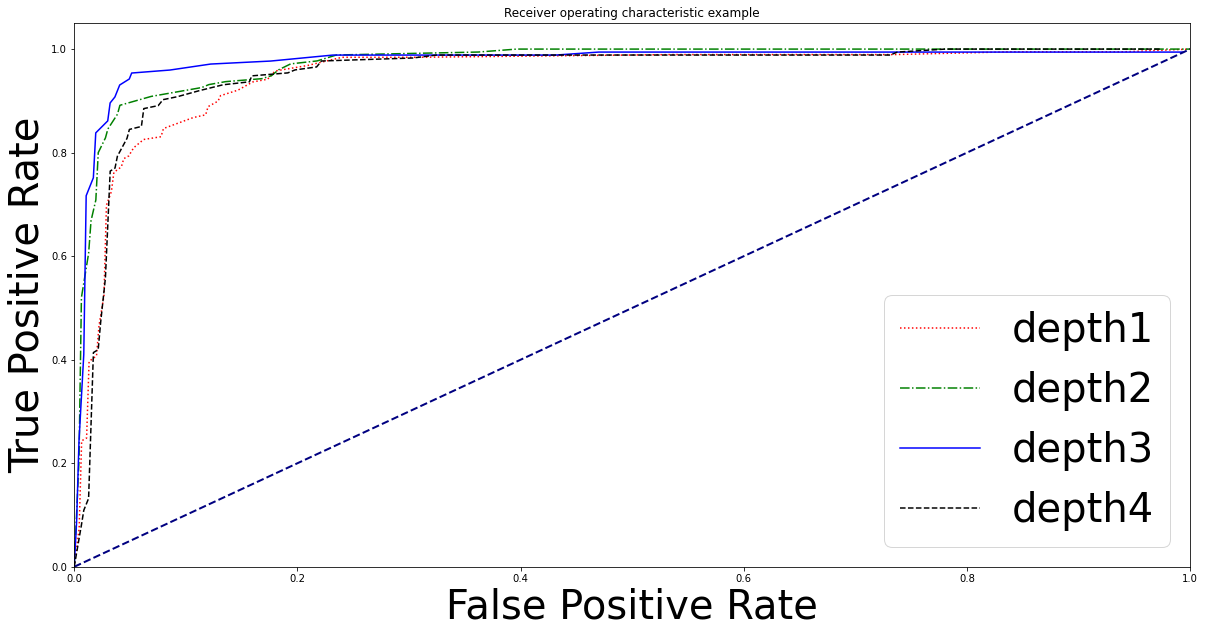

In [8]:
plt.figure(figsize=(20, 10))
lw = 2

#plt.plot(total_fpr[0], total_tpr[0], '^', color='r', label='depth1')
#plt.plot(total_fpr[1], total_tpr[1], 'v', color='g', label='depth2')
#plt.plot(total_fpr[2], total_tpr[2], '-', color='b', label='depth3')
#plt.plot(total_fpr[3], total_tpr[3], 's', color='k', label='depth4')

plt.plot(total_fpr[0], total_tpr[0], linestyle=':', color='r', label='depth1')
plt.plot(total_fpr[1], total_tpr[1], linestyle='-.', color='g', label='depth2')
plt.plot(total_fpr[2], total_tpr[2], linestyle='-', color='b', label='depth3')
plt.plot(total_fpr[3], total_tpr[3], linestyle='--', color='k', label='depth4')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0], )
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=40)
plt.ylabel('True Positive Rate', fontsize=40)
plt.title('Receiver operating characteristic example')

plt.legend(loc='lower right', fontsize=40)

plt.show()